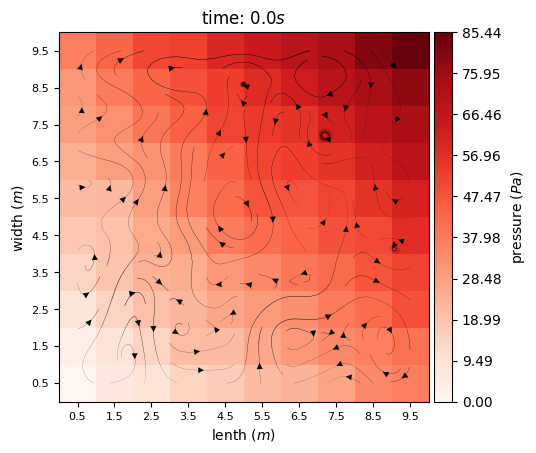

In [25]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


# init parameters
lx = 10.
ly = 10.
nx = 10
ny = 10
nt = 30

dx = lx / nx
dy = ly / ny
dt = 0.1

x = np.linspace(dx/2, lx-dx/2, nx)
y = np.linspace(dy/2, ly-dy/2, ny)
x, y = np.meshgrid(x, y)


# read data
uData = open('./u.txt')
vData = open('./v.txt')
pData = open('./p.txt')

u = []
for i in range(0, nt*ny):
    u.append([float(i) for i in uData.readline().split()])

v = []
for i in range(0, nt*ny):
    v.append([float(i) for i in vData.readline().split()])

p = []
for i in range(0, nt*ny):
    p.append([float(i) for i in pData.readline().split()])

ug = []
for i in range(0, nt*ny, ny):
    ug.append(u[i:i+ny])

vg = []
for i in range(0, nt*ny, ny):
    vg.append(v[i:i+ny])

pg = []
for i in range(0, nt*ny, ny):
    pg.append(p[i:i+ny])

um = np.array(ug)
vm = np.array(vg)

speed = np.sqrt(np.square(um) + np.square(vm))

pm = np.array(pg)
pm = pm - pm.min()


# plot
fig, ax = plt.subplots()
ax.set_aspect('equal')

# set a colorbar axes
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size="5%", pad=0.05)


def update(frame):
    # clear the axes
    ax.cla()

    # set plot info
    ax.set_title('time: ' + str(frame*dt)[:3] + '$s$', fontsize=12)
    ax.set_xlim(0, lx)
    ax.set_ylim(0, ly)
    ax.set_xlabel('lenth $(m)$ ', fontsize=10)
    ax.set_ylabel('width $(m)$ ', fontsize=10)
    ax.set_xticks(np.linspace(dx/2, lx-dx/2, nx))
    ax.set_yticks(np.linspace(dy/2, ly-dy/2, ny))
    ax.set_xticklabels(np.linspace(dx/2, lx-dx/2, nx), fontsize=8)
    ax.set_yticklabels(np.linspace(dy/2, ly-dy/2, ny), fontsize=8)

    # colorbar
    pDistri = ax.pcolormesh(x, y, pm[frame], vmin=pm[frame].min(), vmax=pm[frame].max(), cmap='Reds')  # pressure distribution
    cbar = fig.colorbar(pDistri, cax=ax_cb, ticks=np.linspace(pm[frame].min(), pm[frame].max(), 10))
    cbar.set_label('pressure $(Pa)$ ', labelpad=5, fontsize=10)

    # streamplot
    ax.streamplot(x, y, um[frame], vm[frame], density=0.7, linewidth=speed[frame], color='k')


# save animation
gif = ani.FuncAnimation(fig=fig, func=update, frames=nt-1, interval=500)
gif.save('./lid_driven_flow.gif', dpi=300, writer='pillow')
